### STEP 1:  Importing Required Modules

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 2: Checking is the data clean and complete to use.

In [20]:

def check_pairs(folder):
    # folder = "train1" or "val1"
    img_dir = os.path.join(folder, "images")
    label_dir = os.path.join(folder, "labels")

    # Collect filenames (without extensions)
    images = set(os.path.splitext(f)[0] for f in os.listdir(img_dir))
    labels = set(os.path.splitext(f)[0] for f in os.listdir(label_dir))

    # Compare to find mismatches
    missing_labels = images - labels
    missing_images = labels - images

    print(f"\nChecking {folder}")
    print(f"Total images: {len(images)}")
    print(f"Total labels: {len(labels)}")
    print(f"Missing labels: {missing_labels if missing_labels else 'None'}")
    print(f"Missing images: {missing_images if missing_images else 'None'}")

check_pairs("train1")
check_pairs("val1")


Checking train1
Total images: 1767
Total labels: 1767
Missing labels: None
Missing images: None

Checking val1
Total images: 336
Total labels: 336
Missing labels: None
Missing images: None


#### Hence, our data is clean , complete, and also reday to train 





###  Step 3: YOLOv8 Model Training

After confirming that the dataset is clean and follows the correct YOLO format 
(each image has a corresponding `.txt` label file), we can now train the YOLOv8 model.

The model used here is **YOLOv8n (Nano)** — a lightweight yet powerful object detection model 
provided by Ultralytics. It is pretrained on the COCO dataset and then fine-tuned on our custom 7-class safety dataset.

###  Training Configuration:
- **Base model:** `yolov8n.pt`
- **Epochs:** 50
- **Image size:** 640 × 640
- **Optimizer:** AdamW (default in YOLO)
- **Loss function:** Combination of bounding box loss, classification loss, and DFL loss
- **Validation:** Runs automatically after each epoch

The model will learn to detect and classify the following 7 classes:
> OxygenTank, NitrogenTank, FireExtinguisher, FireAlarm, SafetySwitchPanel, EmergencyPhone, FirstAidBox

Training is performed using the Ultralytics `YOLO` API:
```bash
yolo detect train data=config.yaml model=yolov8n.pt epochs=50 imgsz=640


### Step 4: Model Evaluation and Validation

After training completes, YOLO automatically runs validation on the `val1` dataset.  
It evaluates the model’s ability to generalize to unseen images using the following metrics:

- **Precision (P):** Fraction of detected objects that were correct  
- **Recall (R):** Fraction of true objects that were detected  
- **mAP@0.5:** Mean Average Precision at IoU threshold = 0.5 (standard metric)  
- **mAP@0.5:0.95:** Average precision across multiple IoU thresholds (stricter measure)

These metrics are printed in the console and logged in the `results.csv` file.  
The validation also generates performance plots:
- `results.png` – training & validation loss curves  
- `confusion_matrix.png` – per-class detection accuracy  
- `F1_curve.png` – precision-recall tradeoff visualization

### 📊 Step 5: Visualization of YOLO Training Results

To better understand the model’s performance trends, 
we visualize key metrics recorded during training from the `results.csv` file.

The following visualizations are generated:

1. **Training Loss Curves:**  
   Tracks how the box, class, and DFL losses decrease across epochs.

2. **Validation Metrics:**  
   Shows how Precision, Recall, and mAP improved as training progressed.

3. **Correlation Heatmap:**  
   Reveals relationships between different training metrics, 
   e.g., negative correlation between losses and mAP (as loss decreases, accuracy improves).

These plots help us assess:
- Model convergence  
- Overfitting or underfitting  
- Generalization capability on unseen data


### 5.1 Loading your YOLOv8 training results (CSV generated by YOLO)

In [21]:
results_path = "runs/detect/train/results.csv"
results_df = pd.read_csv(results_path)

print("YOLO Results Loaded Successfully!")
print(results_df.head())

YOLO Results Loaded Successfully!
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   942.839         1.03804         2.95818         1.13630   
1      2  1946.520         1.05092         1.90194         1.11193   
2      3  3254.770         1.07788         1.73900         1.13116   
3      4  4064.900         1.04942         1.55030         1.10890   
4      5  4699.870         1.01983         1.40710         1.09388   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.43535            0.29033           0.30190   
1               0.60028            0.40767           0.45318   
2               0.71278            0.41743           0.49089   
3               0.68644            0.44643           0.51284   
4               0.67314            0.48952           0.56456   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.21720       1.02987       2.33468       1.04471  0.000300   
1   

In [22]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 50 non-null     int64  
 1   time                  50 non-null     float64
 2   train/box_loss        50 non-null     float64
 3   train/cls_loss        50 non-null     float64
 4   train/dfl_loss        50 non-null     float64
 5   metrics/precision(B)  50 non-null     float64
 6   metrics/recall(B)     50 non-null     float64
 7   metrics/mAP50(B)      50 non-null     float64
 8   metrics/mAP50-95(B)   50 non-null     float64
 9   val/box_loss          50 non-null     float64
 10  val/cls_loss          50 non-null     float64
 11  val/dfl_loss          50 non-null     float64
 12  lr/pg0                50 non-null     float64
 13  lr/pg1                50 non-null     float64
 14  lr/pg2                50 non-null     float64
dtypes: float64(14), int64(1)


In [23]:
results_df.describe()

epoch          time  train/box_loss  train/cls_loss  train/dfl_loss  \
count  50.00000     50.000000       50.000000       50.000000       50.000000   
mean   25.50000  22916.631980        0.736439        0.814950        0.963310   
std    14.57738  14642.697519        0.168054        0.460778        0.080740   
min     1.00000    942.839000        0.477420        0.393970        0.837500   
25%    13.25000   9592.885000        0.628855        0.554490        0.919568   
50%    25.50000  19603.850000        0.713245        0.682405        0.955865   
75%    37.75000  36813.250000        0.847275        0.914473        1.007988   
max    50.00000  46175.400000        1.077880        2.958180        1.136300   

       metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
count             50.000000          50.000000         50.000000   
mean               0.828426           0.594396          0.674879   
std                0.091088           0.078514          0.089238   
min                0.435350           0.290330          0.301900   
25%                0.811420           0.572510          0.655235   
50%                0.855125           0.617745          0.703145   
75%                0.882905           0.646770          0.731420   
max                0.932920           0.671600          0.754370   

       metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss  \
count            50.000000     50.000000     50.000000     50.000000   
mean              0.520641      0.713051      0.828833      0.929809   
std               0.081919      0.116032      0.366279      0.046557   
min               0.217200      0.583980      0.532680      0.882170   
25%               0.495175      0.619945      0.587100      0.894140   
50%               0.549605      0.672340      0.692555      0.905925   
75%               0.581160      0.767630      0.893400      0.950845   
max               0.600250      1.029870      2.334680      1.044710   

          lr/pg0     lr/pg1     lr/pg2  
count  50.000000  50.000000  50.000000  
mean    0.000450   0.000450   0.000450  
std     0.000248   0.000248   0.000248  
min     0.000027   0.000027   0.000027  
25%     0.000248   0.000248   0.000248  
50%     0.000450   0.000450   0.000450  
75%     0.000653   0.000653   0.000653  
max     0.000870   0.000870   0.000870

### 5.2 — Training Loss Curves
Purpose: show how training losses decreased over epochs.

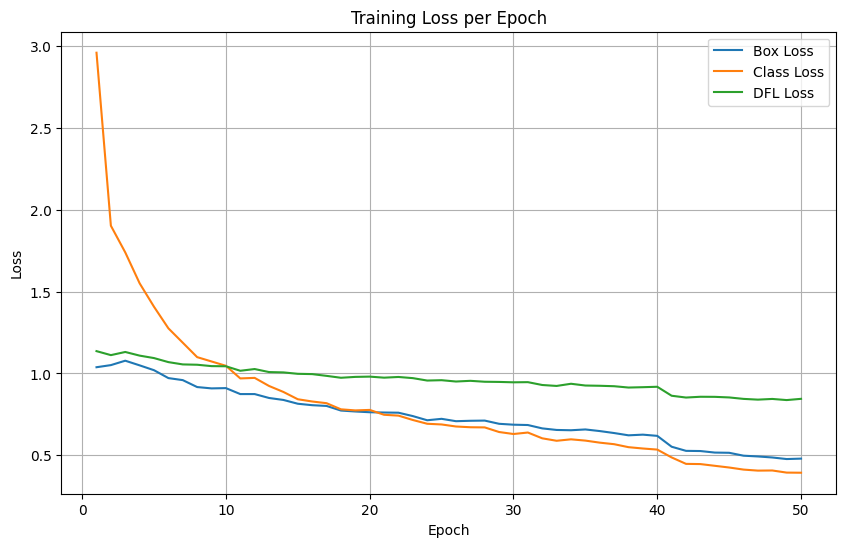

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=results_df, x='epoch', y='train/box_loss', label='Box Loss')
sns.lineplot(data=results_df, x='epoch', y='train/cls_loss', label='Class Loss')
sns.lineplot(data=results_df, x='epoch', y='train/dfl_loss', label='DFL Loss')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True)
plt.show()

### 5.3 — Validation Metrics Progress
Purpose: show how precision, recall, and mAP evolved.

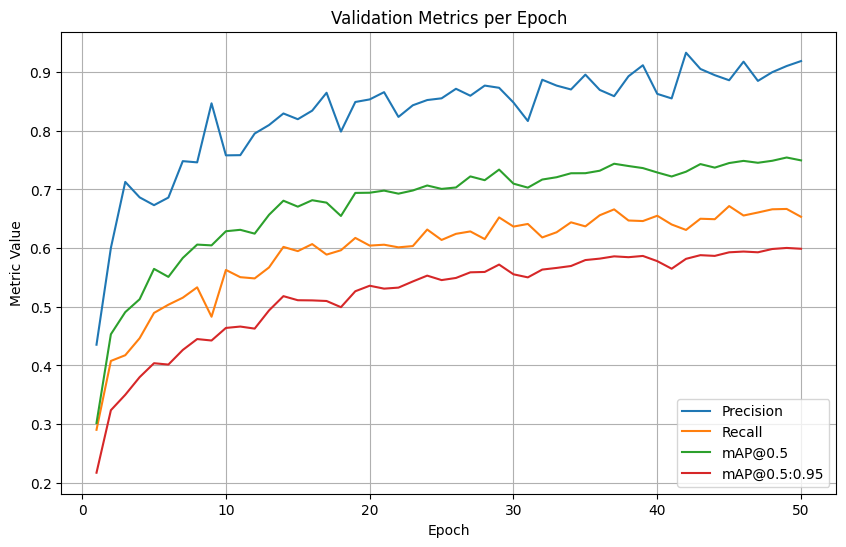

In [25]:
plt.figure(figsize=(10,6))
for col,label in [('metrics/precision(B)','Precision'),
                  ('metrics/recall(B)','Recall'),
                  ('metrics/mAP50(B)','mAP@0.5'),
                  ('metrics/mAP50-95(B)','mAP@0.5:0.95')]:
    sns.lineplot(x='epoch', y=col, data=results_df, label=label)
plt.title("Validation Metrics per Epoch")
plt.xlabel("Epoch"); plt.ylabel("Metric Value"); plt.legend(); plt.grid(True)
plt.show()

### 5.4 — Training vs Validation Loss Comparison

Purpose: detect overfitting or underfitting.

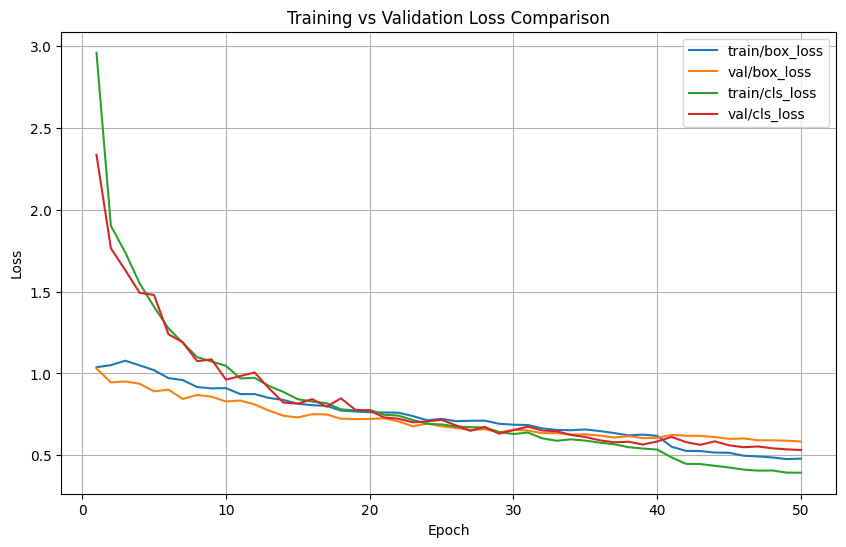

In [26]:
plt.figure(figsize=(10,6))
for c in ['train/box_loss','val/box_loss']:
    sns.lineplot(x='epoch', y=c, data=results_df, label=c)
for c in ['train/cls_loss','val/cls_loss']:
    sns.lineplot(x='epoch', y=c, data=results_df, label=c)
plt.title("Training vs Validation Loss Comparison")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True)
plt.show()

### 5.5 Correlation Heatmap

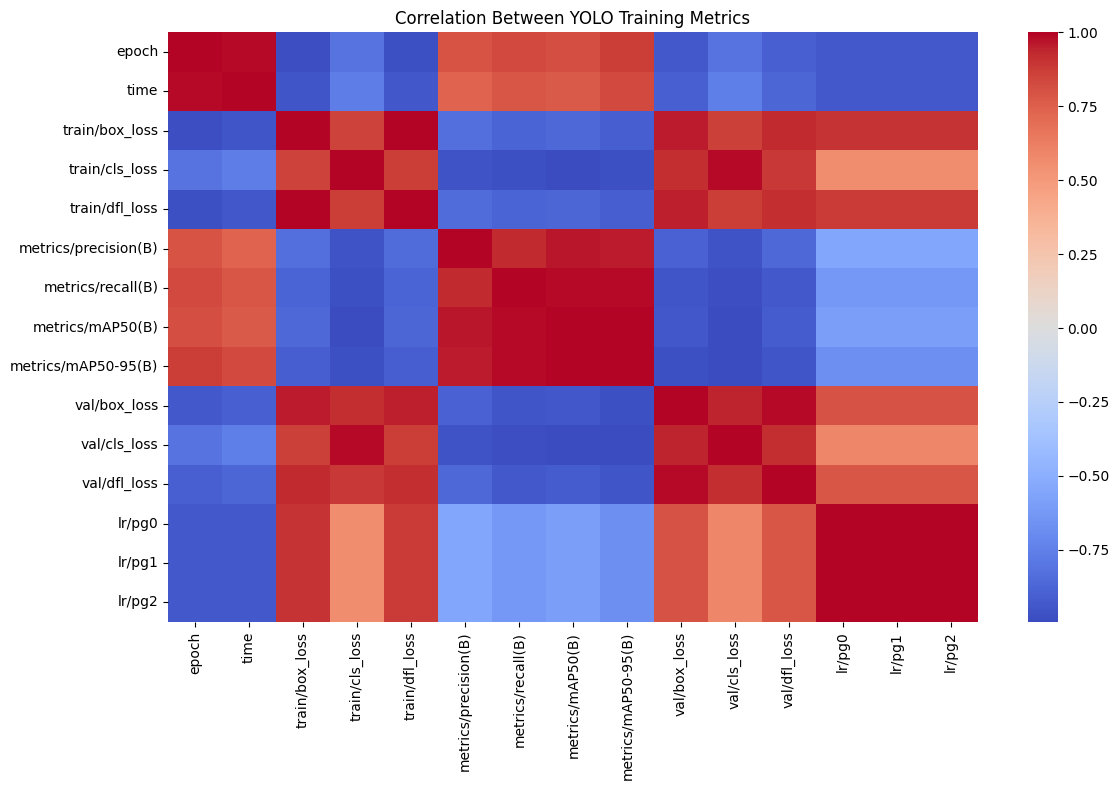

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(results_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Between YOLO Training Metrics')
plt.tight_layout()
plt.show()

### 5.6 — Learning Rate vs mAP
Purpose: see how scheduler affected model accuracy.

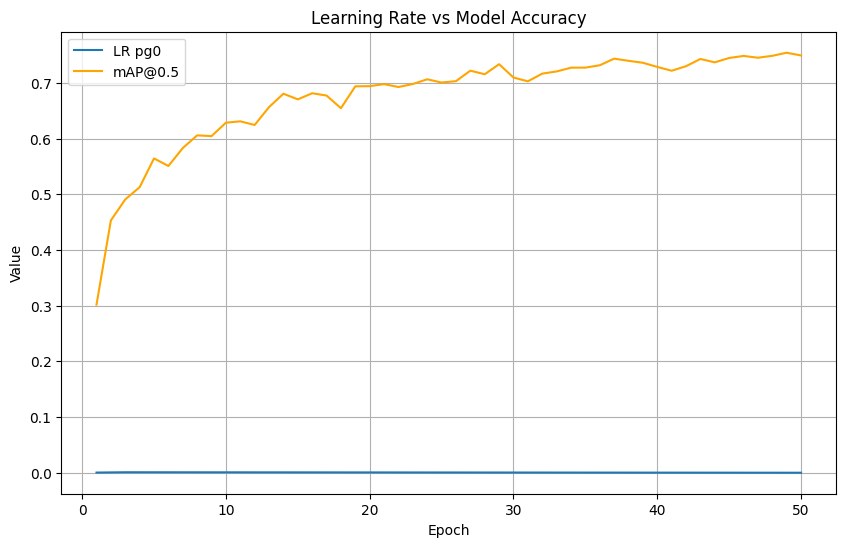

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='epoch', y='lr/pg0', data=results_df, label='LR pg0')
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results_df, label='mAP@0.5', color='orange')
plt.title("Learning Rate vs Model Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Value"); plt.legend(); plt.grid(True)
plt.show()

### 5.7 — Combined Multi-Axis View

Purpose: visualize overall convergence balance between loss and performance.

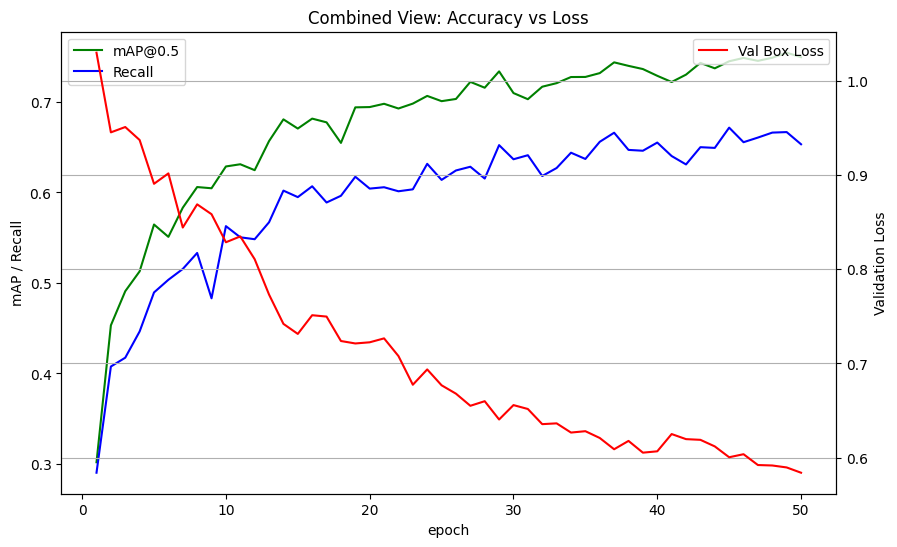

In [29]:
fig, ax1 = plt.subplots(figsize=(10,6))
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results_df, color='green', label='mAP@0.5', ax=ax1)
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results_df, color='blue', label='Recall', ax=ax1)
ax1.set_ylabel('mAP / Recall'); ax1.legend(loc='upper left')

ax2 = ax1.twinx()
sns.lineplot(x='epoch', y='val/box_loss', data=results_df, color='red', label='Val Box Loss', ax=ax2)
ax2.set_ylabel('Validation Loss')
plt.title("Combined View: Accuracy vs Loss")
plt.grid(True); plt.show()

### 5.8 — Time per Epoch vs mAP

Purpose: evaluate training efficiency.

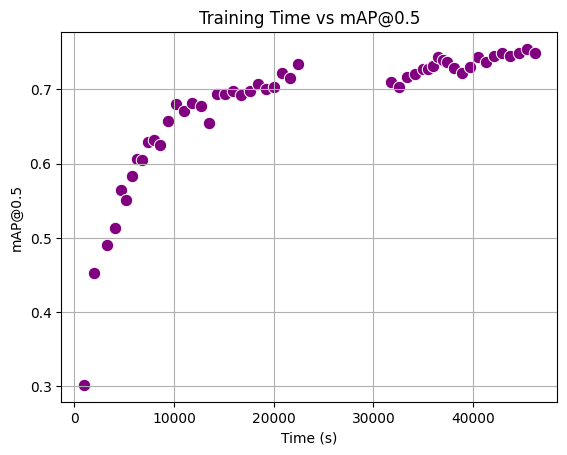

In [30]:
sns.scatterplot(x='time', y='metrics/mAP50(B)', data=results_df, s=80, color='purple')
plt.title("Training Time vs mAP@0.5"); plt.xlabel("Time (s)"); plt.ylabel("mAP@0.5"); plt.grid(True)
plt.show()

### 5.9 — Improvement per Epoch (Δ mAP)

Purpose: see how quickly performance improved.

/var/folders/h3/qxnr_x911vz56lm4l446whph0000gn/T/ipykernel_4708/1128087819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='epoch', y='delta_mAP', data=results_df, palette='coolwarm')


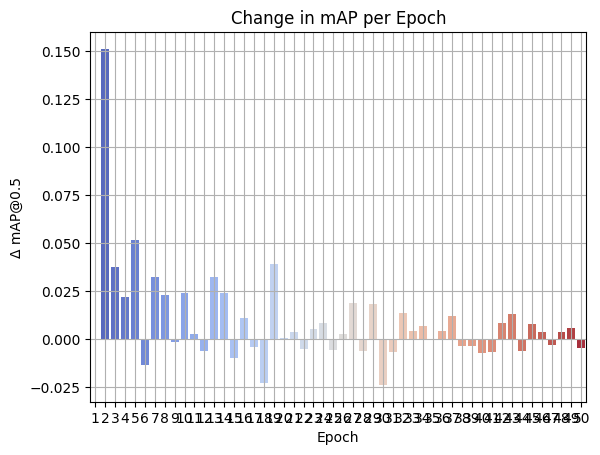

In [31]:
results_df['delta_mAP'] = results_df['metrics/mAP50(B)'].diff()
sns.barplot(x='epoch', y='delta_mAP', data=results_df, palette='coolwarm')
plt.title("Change in mAP per Epoch"); plt.xlabel("Epoch"); plt.ylabel("Δ mAP@0.5"); plt.grid(True)
plt.show()

### 5.10 — Precision–Recall–mAP Pairplot

Purpose: understand relationships and trade-offs between key metrics.

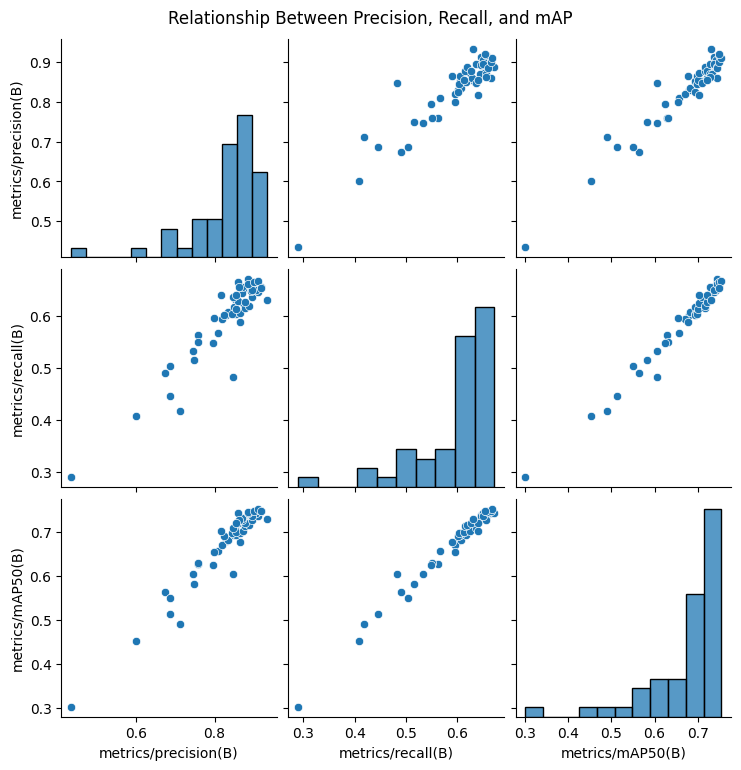

In [32]:
sns.pairplot(results_df[['metrics/precision(B)','metrics/recall(B)','metrics/mAP50(B)']])
plt.suptitle("Relationship Between Precision, Recall, and mAP", y=1.02)
plt.show()

### 5.11 Plot training loss trends per epoch

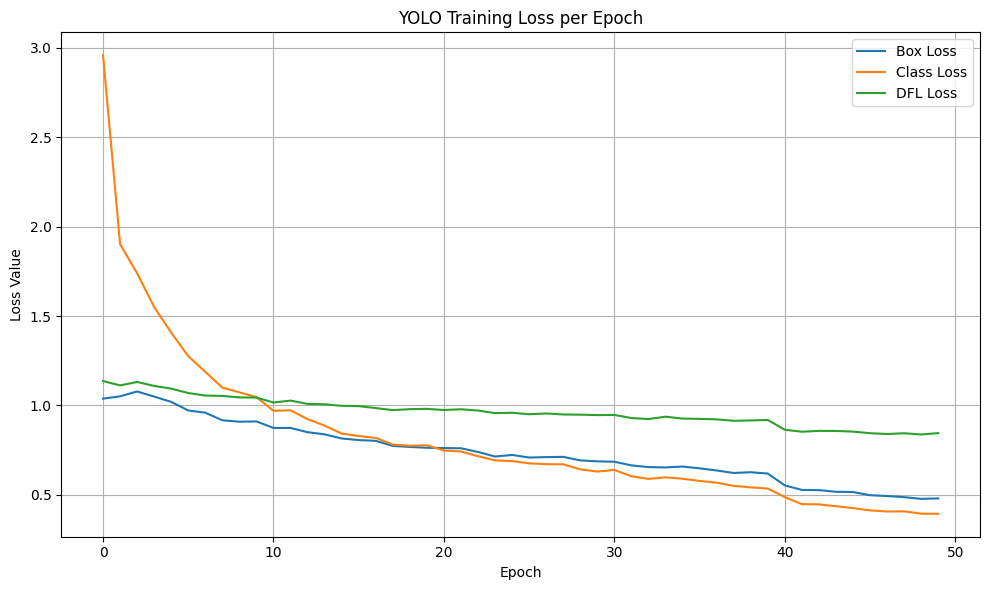

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x=results_df.index, y='train/box_loss', label='Box Loss')
sns.lineplot(data=results_df, x=results_df.index, y='train/cls_loss', label='Class Loss')
sns.lineplot(data=results_df, x=results_df.index, y='train/dfl_loss', label='DFL Loss')
plt.title('YOLO Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.12 Plot validation metrics (Precision, Recall, mAP)

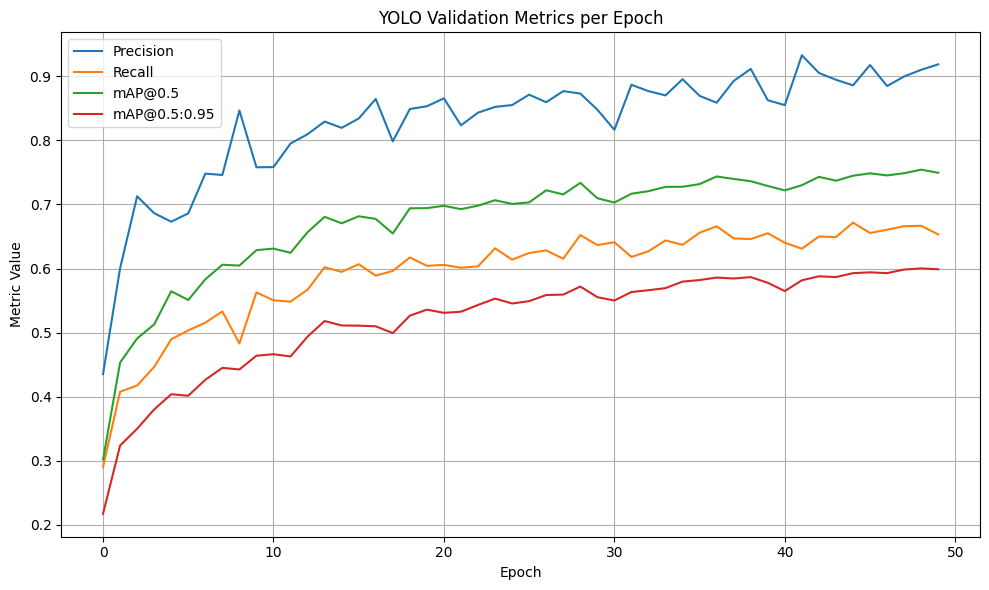

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x=results_df.index, y='metrics/precision(B)', label='Precision')
sns.lineplot(data=results_df, x=results_df.index, y='metrics/recall(B)', label='Recall')
sns.lineplot(data=results_df, x=results_df.index, y='metrics/mAP50(B)', label='mAP@0.5')
sns.lineplot(data=results_df, x=results_df.index, y='metrics/mAP50-95(B)', label='mAP@0.5:0.95')
plt.title('YOLO Validation Metrics per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.13 — Summary Statistics and Best Epoch

Purpose: wrap up the section with descriptive stats and model highlight.

In [35]:
summary = results_df[['train/box_loss','val/box_loss','metrics/mAP50(B)','metrics/precision(B)','metrics/recall(B)']].describe().T
display(summary)

best_epoch = results_df['metrics/mAP50(B)'].idxmax()
print(f"Best Epoch: {best_epoch} | mAP@0.5 = {results_df.loc[best_epoch,'metrics/mAP50(B)']:.4f}")

count      mean       std      min       25%       50%  \
train/box_loss         50.0  0.736439  0.168054  0.47742  0.628855  0.713245   
val/box_loss           50.0  0.713051  0.116032  0.58398  0.619945  0.672340   
metrics/mAP50(B)       50.0  0.674879  0.089238  0.30190  0.655235  0.703145   
metrics/precision(B)   50.0  0.828426  0.091088  0.43535  0.811420  0.855125   
metrics/recall(B)      50.0  0.594396  0.078514  0.29033  0.572510  0.617745   

                           75%      max  
train/box_loss        0.847275  1.07788  
val/box_loss          0.767630  1.02987  
metrics/mAP50(B)      0.731420  0.75437  
metrics/precision(B)  0.882905  0.93292  
metrics/recall(B)     0.646770  0.67160

Best Epoch: 48 | mAP@0.5 = 0.7544


In [36]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
results = model("test1/images", save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1408 /Users/vinayakdixit/Desktop/train_1/test1/images/000000000_light_unclutter.png: 384x640 1 SafetySwitchPanel, 1 EmergencyPhone, 52.7ms
image 2/1408 /Users/vinayakdixit/Desktop/train_1/test1/images/000000000_vdark_clutter.png: 384x640 1 FirstAidBox, 35.5ms
image 3/1408 /Users/vinayakdixit/Desktop/train_1/test1/images/000000000_vlight_unclutter.png: 384x640 1 OxygenTank, 3 NitrogenTanks, 1 FireExtinguisher, 2 SafetySwitchPanels, 37.1ms
image 


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1408 /Users/vinayakdixit/Desktop/train_1/test1/images/000000000_light_unclutter.png: 384x640 1 SafetySwitchPanel, 1 EmergencyPhone, 38.7ms
image 2/1408 /Users/vinayakdixit/Desktop/train_1/test1/images/000000000_vdark_clutter.png: 384x640 1 FirstAidBox, 30.7ms
image 3/1408 /Users/vinayakdixit/Desktop/train_1/test1/images/000000000_vlight_unclutter.png: 384x640 1 OxygenTank, 3 NitrogenTanks, 1 FireExtinguisher, 2 SafetySwitchPanels, 38.0ms
image 

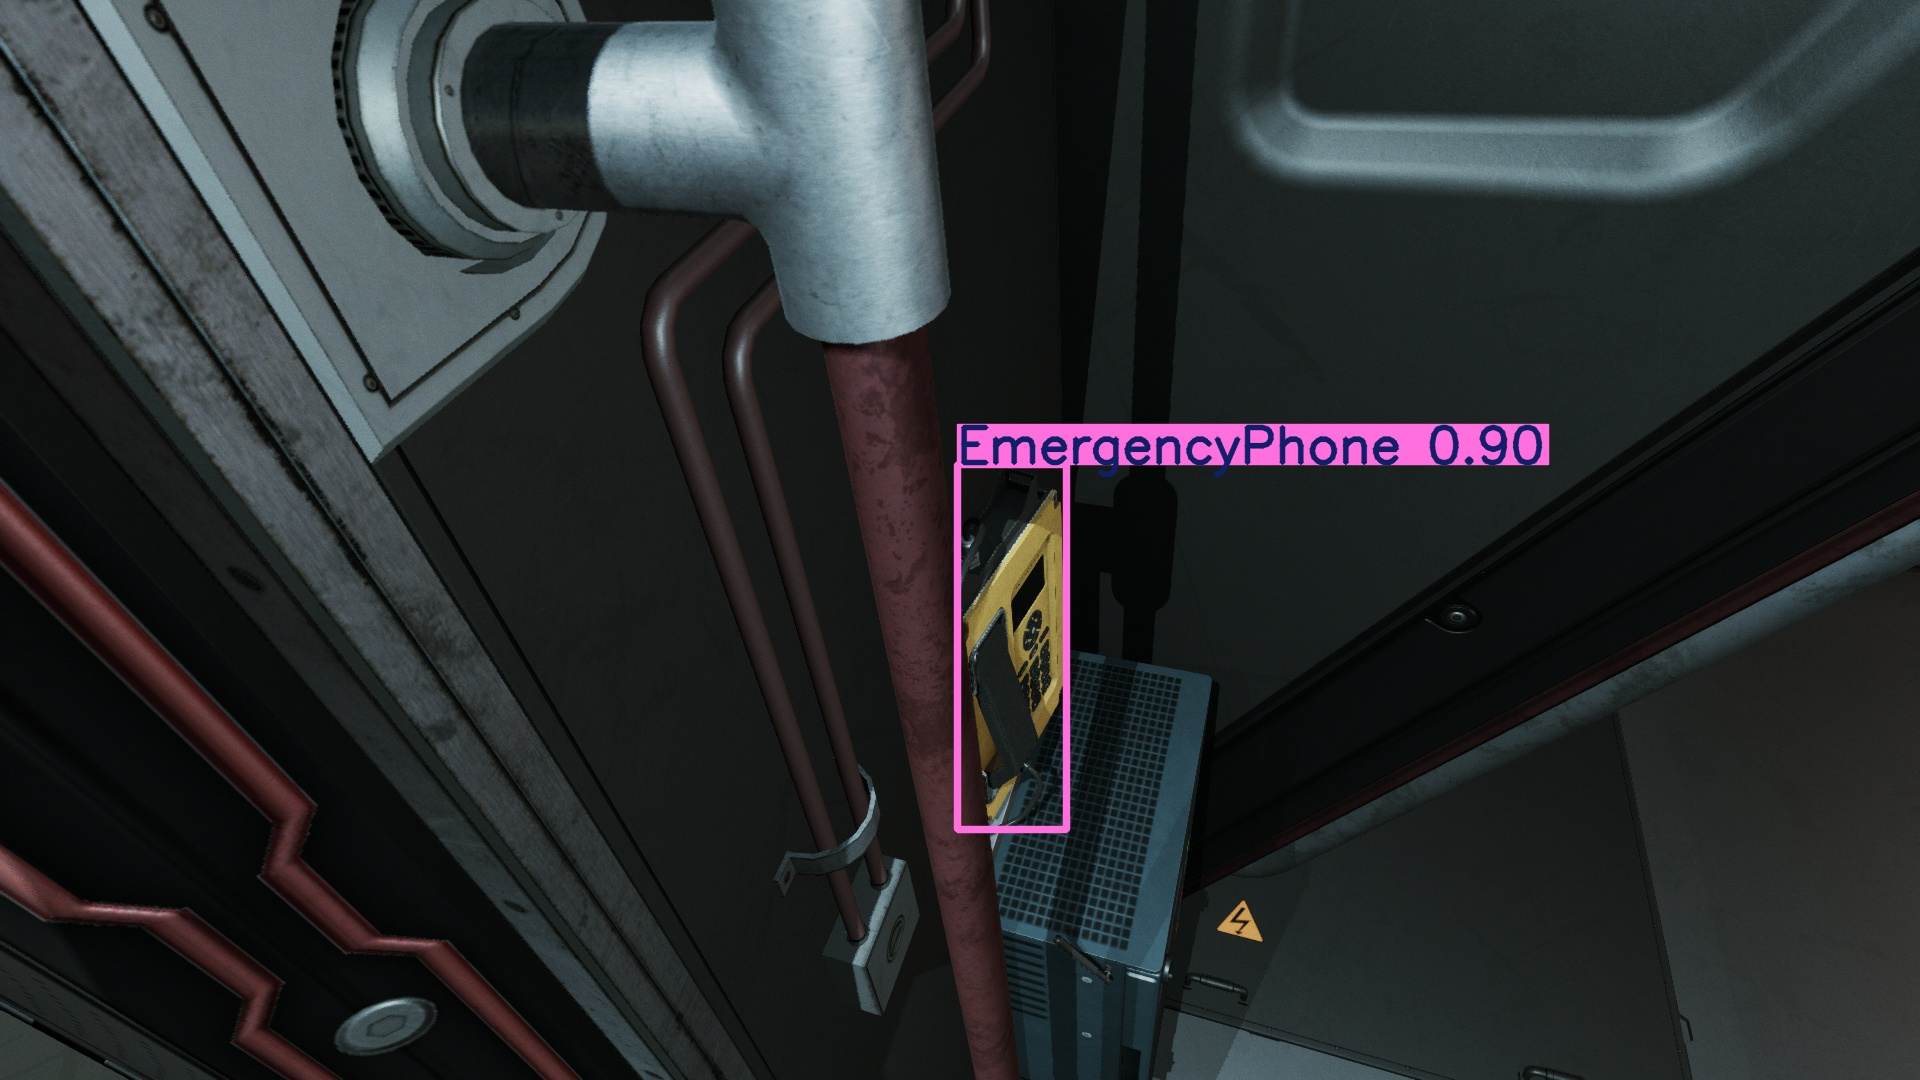

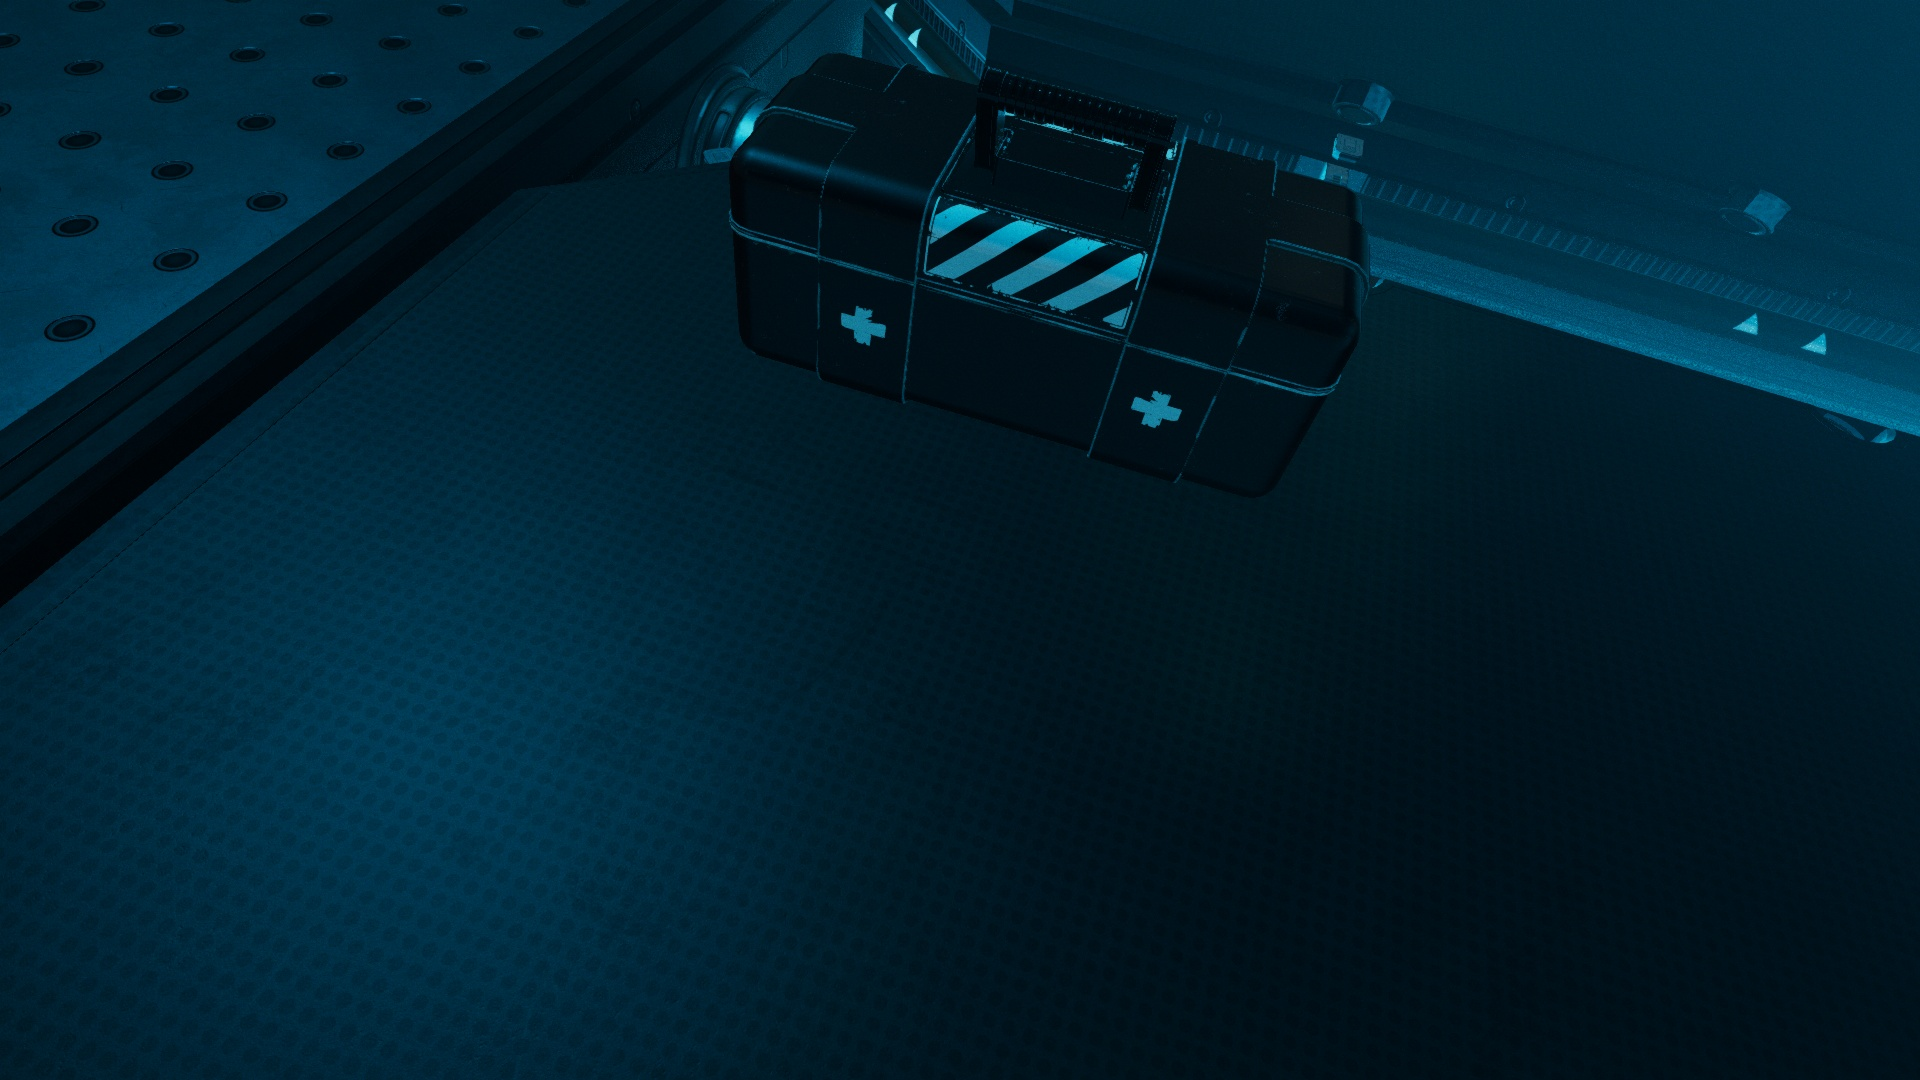

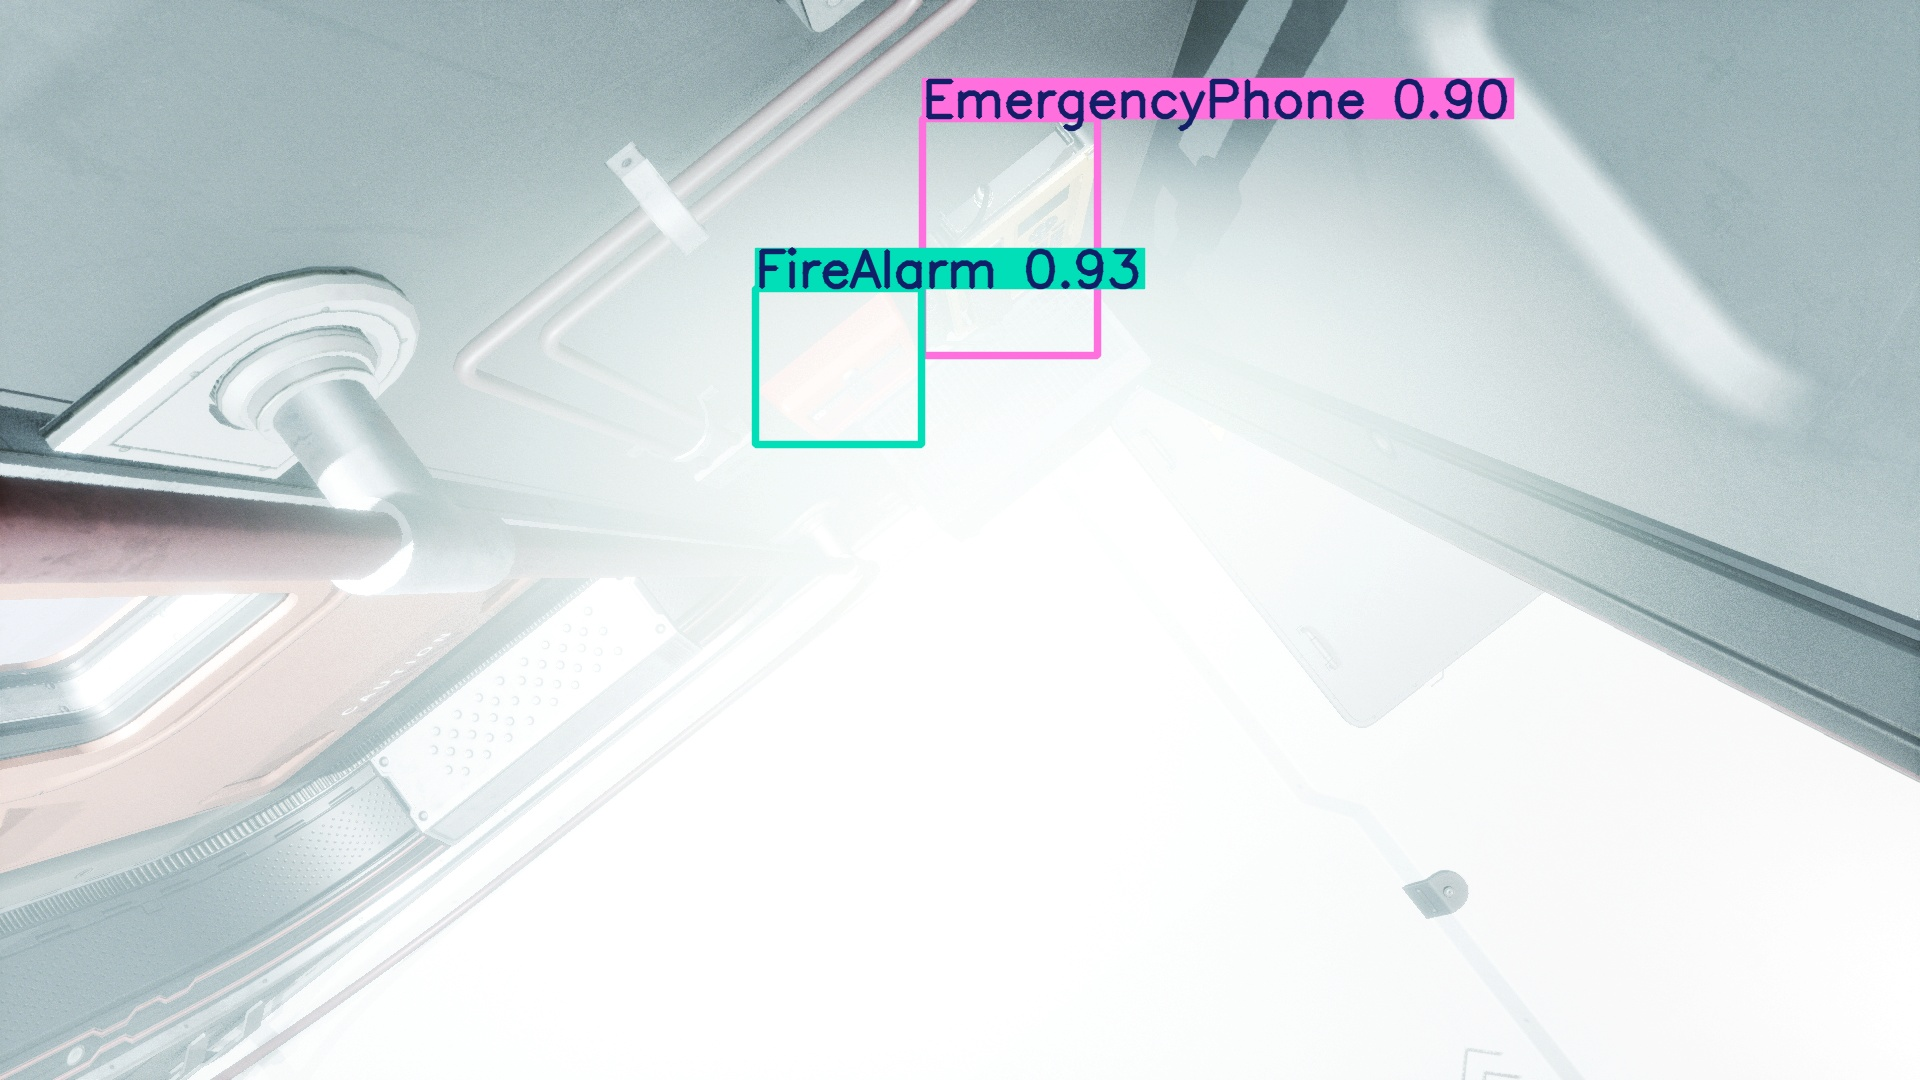

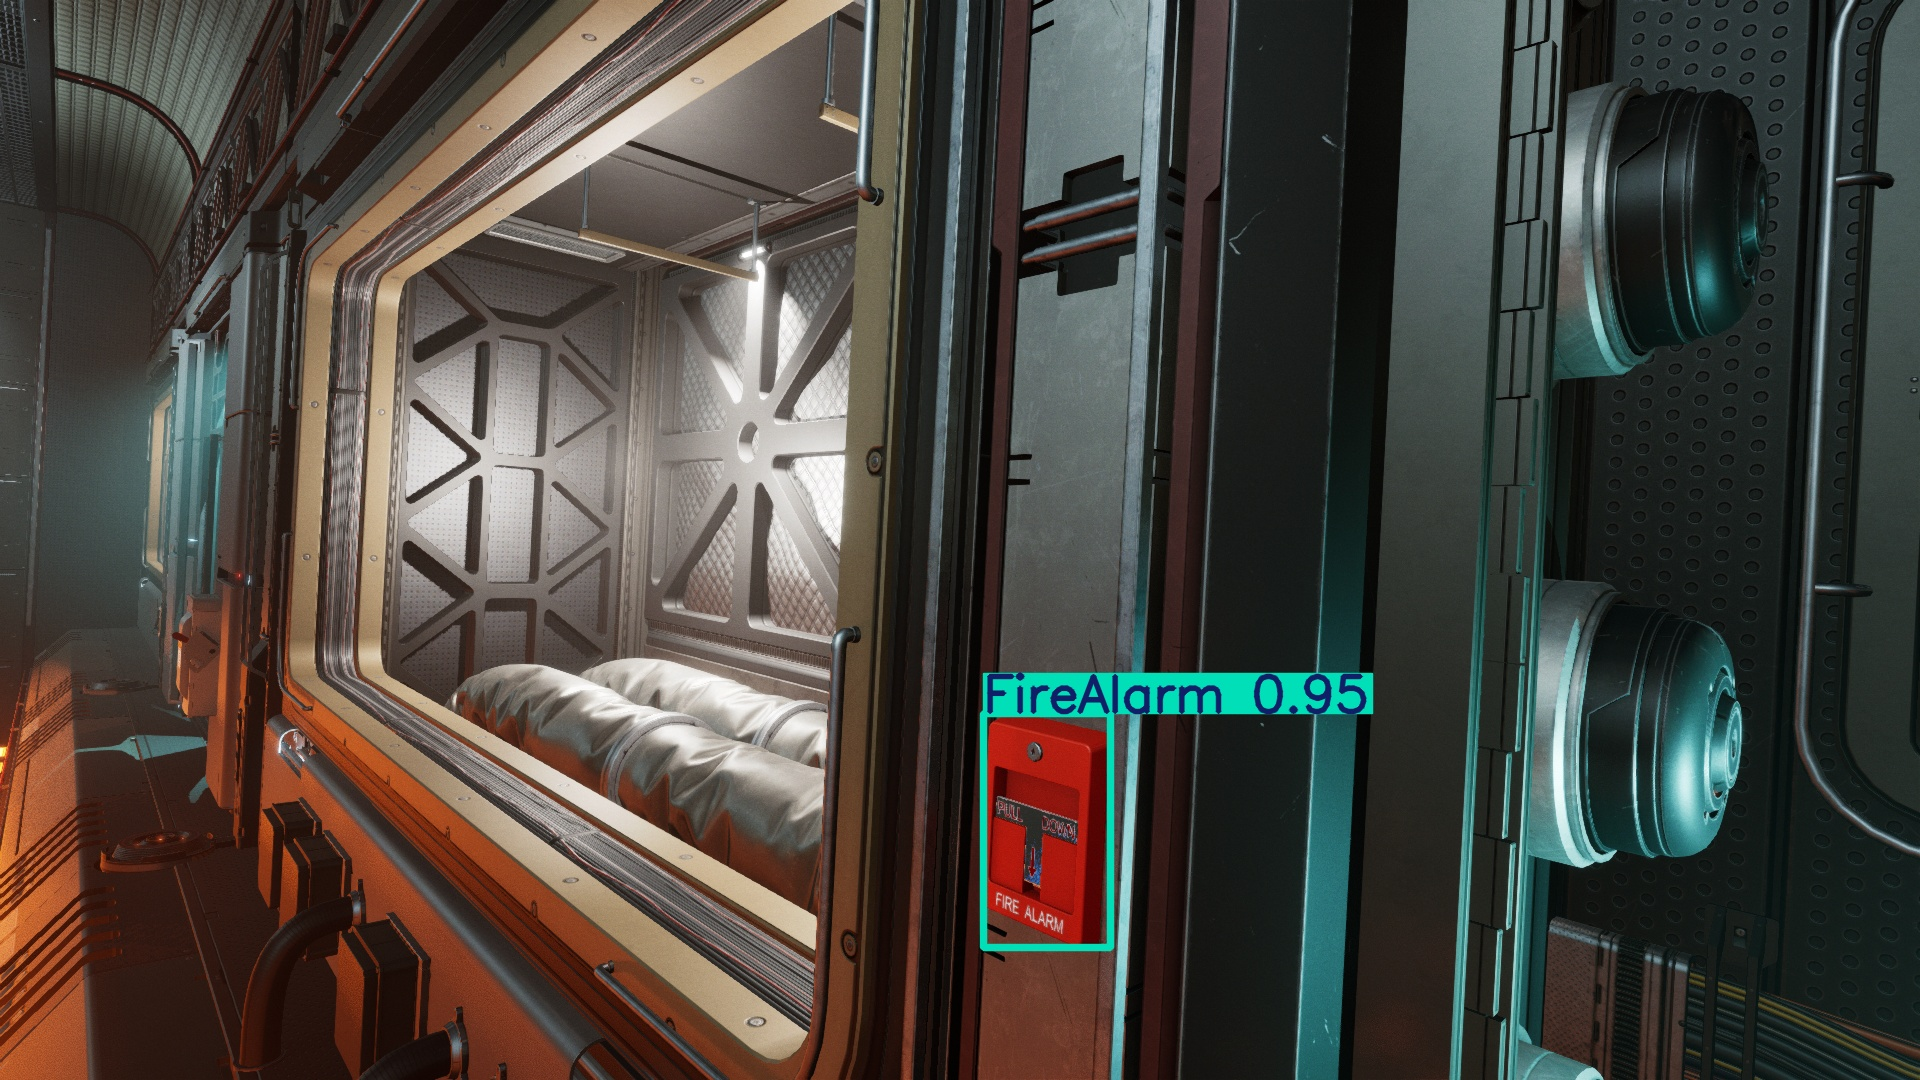

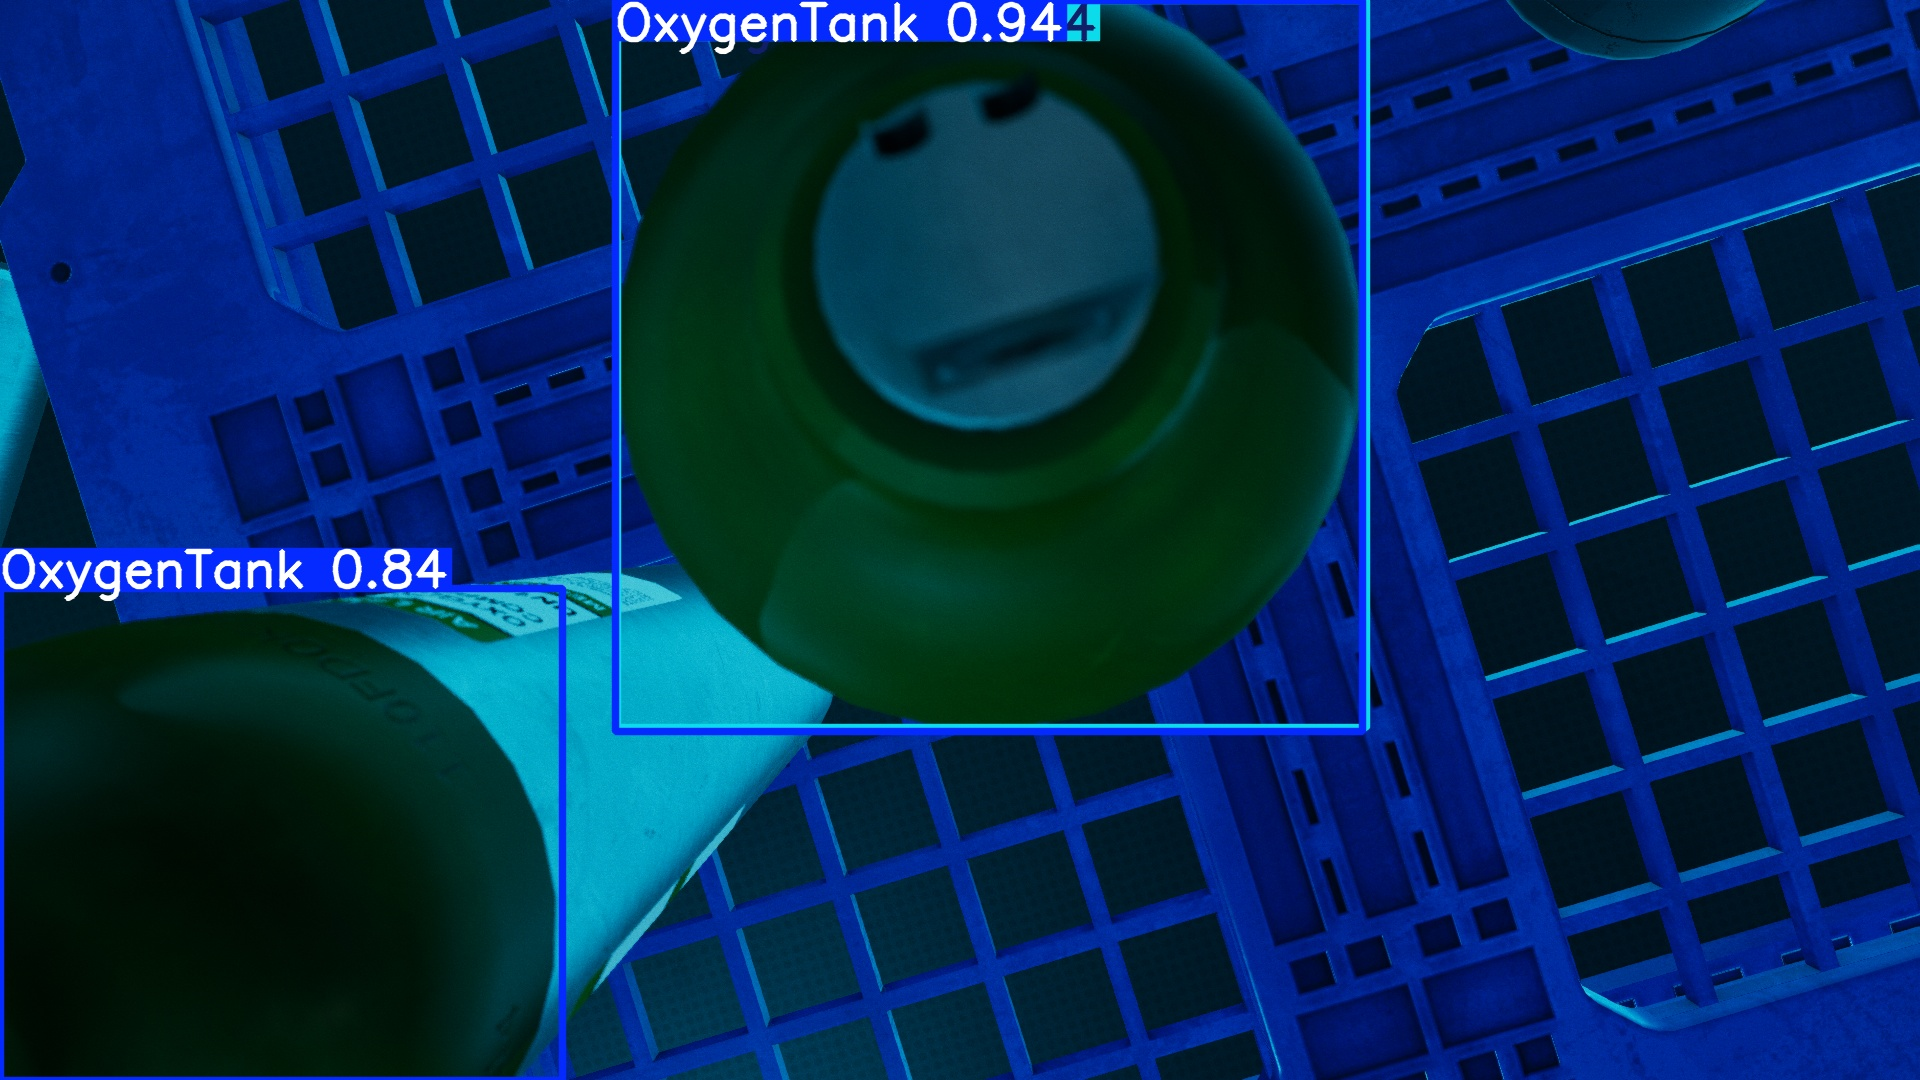

In [37]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run prediction on test images
results = model("test1/images", imgsz=640, save=True)

# Path where YOLO saved predictions
pred_path = "/Users/vinayakdixit/Desktop/train_1/runs/detect/predict4"
print("Predictions saved in:", pred_path)

# Display a few sample predicted images
sample_images = os.listdir(pred_path)[:5]  # first 5 predictions

print("\nShowing sample predictions:")
for img in sample_images:
    display(Image(filename=os.path.join(pred_path, img)))
